First of all we have to know what is MNIST dataset.  
Today, MNIST dataset serves as more of sanity checks than as a benchmark.

This notebook, we'll gonna use fashion-MNIST dataset.(dataset for classify clothes, boots, coats, etc..)  
Fashion-MNIST consists of images from 10 categories, each represented by 6000 images in the training datset and by 1000 in the test datset.

In [1]:
# The Image Classification Dataset

%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [2]:
# Reading the dataset

# 'ToTensor' converts the image data from PIL type to 32-bit floating point! It's important tensors.
# It divides all numbers by 255.0 so that all pixel values are between 0 and 1

mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=transforms.ToTensor(), download=True)

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
# The height and width of each input image are both 28 pixels

print(mnist_train[0][0].shape)

torch.Size([1, 28, 28])


The images in Fashion-MNIST are associated with the following categories:  
 - t-shirt  
 - trouser  
 - pullover  
 - dress  
 - coat  
 - sandal  
 - shirt  
 - sneaker  
 - bag  
 - ankle boot

In [5]:
def get_fashion_mnist_labels(labels):
    """Return text labels for the Fashion-MNIST dataset"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [6]:
# Function to visualize these examples

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

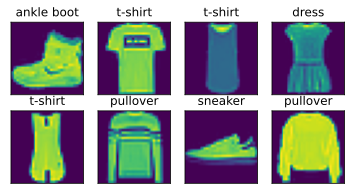

In [8]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=8)))
show_images(X.reshape(8, 28, 28), 2, 4, titles=get_fashion_mnist_labels(y));

In [9]:
batch_size = 256

def get_dataloader_workers():
    # Use 4 processes to read the data
    return 4

In [10]:
# Putting all togeter

def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers()),
             data.DataLoader(mnist_test, batch_size, shuffle=False,
                             num_workers=get_dataloader_workers()))

In [11]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
